# Building Autonomous Trader using mt5se

### Installing mt5se
### 1. Download it from https://github.com/paulo-al-castro/mt5se/
### 2. unzip it in a proper fold
### 3. Install Metatrader 5 (https://www.metatrader5.com/)
### 4. Install python package Metatrader5 using pip
####   Use: pip install MetaTrader5 ... or Use sys package




In [8]:
# installing Metatrader5 using sys
import sys
# python MetaTrader5
#!{sys.executable} -m pip install MetaTrader5
#mt5se 
!{sys.executable} -m pip install mt5se --upgrade



Processing c:\users\pauloandre\appdata\local\pip\cache\wheels\e6\b6\6d\14b6a97b1f8126d4a265096844d025af9b54f66648eaba9f19\mt5se-0.1.9-py3-none-any.whl
  Attempting uninstall: mt5se
    Found existing installation: mt5se 0.1.8
    Uninstalling mt5se-0.1.8:
      Successfully uninstalled mt5se-0.1.8



<hr>

##  Connecting and getting account information


In [1]:
import mt5se as se

connected=se.connect()
if connected:
    print('Ok!! It is connected to the Stock exchange!!')
else:
    print('Something went wrong! It is NOT connected to se!!')




Ok!! It is connected to the Stock exchange!!


In [5]:
ti=se.terminal_info()
print('Metatrader program file path: ', ti.path)   
print('Metatrader path to data folder: ', ti.data_path )
print('Metatrader common data path: ',ti.commondata_path)

Metatrader program file path:  C:\Program Files\MetaTrader 5 Terminal
Metatrader path to data folder:  C:\Users\PauloAndre\AppData\Roaming\MetaQuotes\Terminal\FB9A56D617EDDDFE29EE54EBEFFE96C1
Metatrader common data path:  C:\Users\PauloAndre\AppData\Roaming\MetaQuotes\Terminal\Common


<hr>

### Getting information about the account

In [6]:
acc=se.account_info()   # it returns account's information 
print('login=',acc.login)  # Account id
print('balance=',acc.balance) # Account balance in the deposit currency  using buy price of assets (margin_free+margin)
print('equity=',acc.equity) # Account equity in the deposit currency using current price of assets (capital liquido) (margin_free+margin+profit)
print('free margin=',acc.margin_free) # Free margin ( balance in cash ) of an account in the deposit currency(BRL)
print('margin=',acc.margin)  #Account margin used in the deposit currency (equity-margin_free-profit )
print('client name=',acc.name) #Client name
print('Server =',acc.server) # Trade server name
print('Currency =',acc.currency) # Account currency, BRL for Brazilian Real


login= 20604
balance= 100001.1
equity= 100146.1
free margin= 97661.4
margin= 2484.7
client name= paulo castro
Server = Tradeview-Demo
Currency = USD


<hr>

### Getting info about asset's prices quotes (a.k.a bars)



In [7]:
import pandas as pd

# Some example of Assets in Nasdaq
assets=[
'AAL', #	American Airlines Group, Inc.	
'GOOG', #		Apple Inc.		
'UAL', #		United Airlines Holdings, Inc.	
'AMD',  #		Advanced Micro Devices, Inc.	
'MSFT' #		MICROSOFT
]
asset=assets[0]

df=se.get_bars(asset,10) # it returns the last 10 days
print(df)

        time   open   high    low  close  tick_volume  spread  real_volume
0 2021-04-14  23.02  23.02  22.20  22.36        69623       0      3111073
1 2021-04-15  22.65  22.65  21.69  22.13        68339       0      3004358
2 2021-04-16  22.01  22.35  21.87  22.01        64555       0      2957521
3 2021-04-19  21.96  21.98  21.37  21.55        79229       0      3297570
4 2021-04-20  21.02  21.02  19.96  20.36        83509       0      3496234
5 2021-04-21  20.00  21.02  19.64  20.99        81736       0      3501087
6 2021-04-22  21.57  21.59  20.04  20.07        87741       0      4550065
7 2021-04-23  20.26  21.19  20.18  21.10        74520       0      3555802
8 2021-04-26  21.52  22.04  21.47  22.03        79937       0      3904580
9 2021-04-27  22.00  22.06  21.60  21.76        75118       0      3892413


<hr>

### Getting information about current position


In [8]:
print('Position=',se.get_positions())  # return the current value of assets (not include balance or margin)
symbol_id='MSFT'
print('Position on paper ',symbol_id,' =',se.get_position_value(symbol_id)) # return the current position in a given asset (symbol_id)

pos=se.get_position_value(symbol_id)
print(pos)



Position=   symbol  type  volume  price_open  price_current
0   MSFT     0    10.0      248.47         262.97
Position on paper  MSFT  = 2629.7000000000003
2629.7000000000003


<hr>

### Creating, checking and sending orders


In [9]:
###Buying three hundred shares of AAPL !!
symbol_id='AAPL'
bars=se.get_bars(symbol_id,2)
price=se.get_last(bars)
volume=300


b=se.buyOrder(symbol_id,volume, price ) # price, sl and tp are optional

if se.is_market_open(symbol_id):
    print('Market is Open!!')
else:
    print('Market is closed! Orders will not be accepted!!')

if se.checkOrder(b):
    print('Buy order seems ok!')
else:
    print('Error : ',se.getLastError())


# if se.sendOrder(b):
#     print('Order executed!)


Market is Open!!
Buy order seems ok!


### Direct Control Robots using mt5se

In [10]:


import mt5se as se
import pandas as pd
import time
asset='AAPL'

def run(asset):
    while se.is_market_open(asset):
        print("getting information")
        bars=se.get_bars(asset,14)
        curr_shares=se.get_shares(asset)
        # number of shares that you can buy
        free_shares=se.get_affor_shares(asset)
        rsi=se.tech.rsi(bars)
        print("deliberating")
        if rsi>=70 and free_shares>0: 
            order=se.buyOrder(asset,free_shares)
        elif  rsi<70 and curr_shares>0:
            order=se.sellOrder(asset,curr_shares)
        else:
            order=None
        print("sending order")
        # check and send (it is sent only if check is ok!)
        if order!=None:
            if se.checkOrder(order) and se.sendOrder(order): 
                print('order sent to se')
            else:
                print('Error  : ',se.getLastError())
        else:
            print("No order at the moment for asset=",asset )
        time.sleep(1)   # waits one second   		
    print('Market is now closed!')

if se.connect()==False:
    print('Error when trying to connect to se')
    exit()
else:
    run(asset) # trade asset PETR4

getting information
deliberating
sending order
No order at the moment for asset= AAPL
getting information
deliberating
sending order
No order at the moment for asset= AAPL
getting information
deliberating
sending order
No order at the moment for asset= AAPL
getting information
deliberating
sending order
No order at the moment for asset= AAPL
getting information
deliberating
sending order
No order at the moment for asset= AAPL
getting information
deliberating
sending order
No order at the moment for asset= AAPL


KeyboardInterrupt: 

### Multiple asset Trading Robot

In [15]:
#Multiple asset Robot (Example), single strategy for multiple assets, where the resources are equally shared among the assets
import time

def runMultiAsset(assets):
    while se.is_market_open(assets[0]):
        for asset in assets:
            bars=se.get_bars(asset,14)    #get information
            curr_shares=se.get_shares(asset)
            money=se.account_info().margin_free/len(assets)   # number of shares that you can buy
            free_shares=se.get_affor_shares(asset,money)
            rsi=se.tech.rsi(bars)
            if rsi>=70 and free_shares>0: 
                order=se.buyOrder(asset,free_shares)
            elif  rsi<70 and curr_shares>0:
                order=se.sellOrder(asset,curr_shares)
            else:
                order=None
            if order!=None: # check and send if it is Ok
                if se.checkOrder(order) and se.sendOrder(order): 
                    print('order sent to se')
                else:
                    print('Error  : ',se.getLastError())
            else:
                print("No order at the moment for asset=",asset)
            time.sleep(1) 
    print('Market is now closed!')
		



## Running multiple asset direct control code!



In [16]:

assets=['GOOG','AAPL']

runMultiAsset(assets) # trade asset 

No order at the moment for asset= GOOG
No order at the moment for asset= AAPL
No order at the moment for asset= GOOG
No order at the moment for asset= AAPL


KeyboardInterrupt: 

### Processing Financial Data - Return Histogram Example 

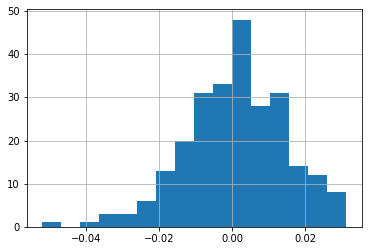

In [1]:
import mt5se as se
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
asset='MSFT'
se.connect()
bars=se.get_bars(asset,252) # 252 business days (basically one year)
x=se.get_returns(bars)  # calculate daily returns given the bars
#With a small change we can see the historgram of weekly returns
#x=se.getReturns(bars,offset=5)
plt.hist(x,bins=16)  # creates a histogram graph with 16 bins
plt.grid()
plt.show()


### Robots based on Inversion of control 

You may use an alternative method to build your robots, that may reduce your workload. It is called inverse control robots. You receive the most common information requrired by robots and returns your orders

Let's some examples of Robots based on Inversion of Control including the multiasset strategy presented before in a  inverse control implementation

### Trader class
Inversion of control Traders are classes that inherint from se.Trader and they have to implement just one function:
trade: It is called at each moment, with dbars. It should returns the list of orders to be executed or None if there is no order at the moment

Your trader may also implement two other function if required:
setup: It is called once when the operation starts. It receives dbars ('mem' bars from each asset) . See the operation setup, for more information

ending: It is called one when the sheculed operation reaches its end time.

Your  Trader class may also implement a constructor function

Let's see an Example!

### A Very Dummy Trader

In [2]:
import numpy.random as rand

class DummyTrader(se.Trader):
    def __init__(self):
        pass

    def setup(self,dbars):
        print('just getting started!')

    def trade(self,ops,dbars):
        orders=[] 
        assets=ops['assets']
        for asset in assets:
            if rand.randint(2)==1:     
                order=se.buyOrder(asset,100)
            else:
            	order=se.sellOrder(asset,100)
            orders.append(order)
        return orders
    
    def ending(self,dbars):
        print('Ending stuff')


if issubclass(DummyTrader,se.Trader):
    print('Your trader class seems Ok!')
else:
    print('Your trader class should a subclass of se.Trader')

trader=DummyTrader()  # DummyTrader class also available in se.sampleTraders.DummyTrader()


Your trader class seems Ok!


### Another Example of Trader class

In [3]:
class MultiAssetTrader(se.Trader):
    def trade(self,bts,dbars):
        assets=dbars.keys()
        orders=[]
        for asset in assets:
            bars=dbars[asset]
            curr_shares=se.backtest.get_shares(bts,asset)
            money=se.backtest.get_balance(bts)/len(assets) # divide o saldo em dinheiro igualmente entre os ativos
            # number of shares that you can buy of asset 
            free_shares=se.backtest.get_affor_shares(bts,dbars,asset,money)
            rsi=se.tech.rsi(bars)
            if rsi>=70 and free_shares>0: 
                order=se.buyOrder(asset,free_shares)
            elif  rsi<70 and curr_shares>0:
                order=se.sellOrder(asset,curr_shares)
            else:
                order=None
            if order!=None:
                orders.append(order)
        return orders   

if issubclass(MultiAssetTrader,se.Trader):
    print('Your trader class seems Ok!')
else:
    print('Your trader class should a subclass of se.Trader')

trader=MultiAssetTrader()  

Your trader class seems Ok!


### Testing your Trader!!!

The evaluation for trading robots is usually called backtesting. That means that a trading robot executes with  historical  price  series , and its performance is computed

In backtesting, time is discretized according with bars and the package mt5se controls the information access to the Trader according with the simulated time.

To backtest one strategy, you just need to create a subclass of Trader and implement one function:
trade

You may implement function setup, to prepare the Trader Strategy if it is required and a function ending to clean up after the backtest is done

The simulation time advances and in function 'trade' the Trader class receives the new bar info and decides wich orders to send




## Let's create a Simple Algorithmic Trader and Backtest it

In [4]:
## Defines the Trader

class MonoAssetTrader(se.Trader):
    def trade(self,bts,dbars):
        assets=dbars.keys()
        asset=list(assets)[0]
        orders=[]
        bars=dbars[asset]
        curr_shares=se.backtest.get_shares(bts,asset)
        # number of shares that you can buy
        free_shares=se.backtest.get_affor_shares(bts,dbars,asset)
        rsi=se.tech.rsi(bars)
        if rsi>=70:   
            order=se.buyOrder(asset,free_shares)
        else:
            order=se.sellOrder(asset,curr_shares)
        if rsi>=70 and free_shares>0: 
            order=se.buyOrder(asset,free_shares)
        elif  rsi<70 and curr_shares>0:
            order=se.sellOrder(asset,curr_shares)
        if order!=None:
                orders.append(order)
        return orders   

trader=MonoAssetTrader() # also available in se.sampleTraders.MonoAssetTrader()
print(trader)


## Setup and check a backtest!

In [5]:
# sets Backtest options 
prestart=se.date(2018,12,10)
start=se.date(2019,1,10)
end=se.date(2019,2,27)
capital=1000000
results_file='data_equity_file.csv'
verbose=False 
assets=['AAPL']
# Use True if you want debug information for your Trader 
#sets the backtest setup
period=se.DAILY 
 # it may be se.INTRADAY (one minute interval)
bts=se.backtest.set(assets,prestart,start,end,period,capital,results_file,verbose)

# check if the backtest setup is ok!
if se.backtest.checkBTS(bts): 
    print('Backtest Setup is Ok!')
else:
    print('Backtest Setup is NOT Ok!')



Backtest Setup is Ok!


## Run the Backtest

In [6]:

# Running the backtest
df= se.backtest.run(trader,bts)   
# run calls the Trader. setup and trade (once for each bar)



End of backtest with  32  bars,  saving equity file in  data_equity_file.csv


## Evaluate the Backtest result

In [7]:
#print the results
print(df)

# evaluates the backtest results
se.backtest.evaluate(df)


         date     balance      equity  load
0  2019-01-11  1000000.00  1000000.00   0.0
1  2019-01-14  1000000.00  1000000.00   0.0
2  2019-01-15  1000000.00  1000000.00   0.0
3  2019-01-16  1000000.00  1000000.00   0.0
4  2019-01-17  1000000.00  1000000.00   0.0
5  2019-01-18  1000000.00  1000000.00   0.0
6  2019-01-22  1000000.00  1000000.00   0.0
7  2019-01-23  1000000.00  1000000.00   0.0
8  2019-01-24  1000000.00  1000000.00   0.0
9  2019-01-25  1000000.00  1000000.00   0.0
10 2019-01-28  1000000.00  1000000.00   0.0
11 2019-01-29  1000000.00  1000000.00   0.0
12 2019-01-30  1000000.00  1000000.00   0.0
13 2019-01-31  1000000.00  1000000.00   0.0
14 2019-02-01  1000000.00  1000000.00   0.0
15 2019-02-04   -26968.81  1000000.00   0.0
16 2019-02-05   -26968.81  1017157.14   0.0
17 2019-02-06   -26968.81  1017877.02   0.0
18 2019-02-07   -26968.81   998500.25   0.0
19 2019-02-08   994060.99   994060.99   0.0
20 2019-02-11   994060.99   994060.99   0.0
21 2019-02-12   994060.99   9940

## Evaluating Backtesting results

The method backtest.run creates a data file with the name given in the backtest setup (bts) 

This will give you a report about the trader performance

We need ot note that it is hard to perform meaningful evaluations using backtest. There are many pitfalls to avoid and it may be easier to get trading robots with great performance in backtest, but that perform really badly in real operations. 

More about that in mt5se backtest evaluation chapter.

For a deeper discussion, we suggest:
Is it a great Autonomous Trading Strategy or you are just fooling yourself Bernardini,M. and Castro, P.A.L

In order to analyze the trader's backtest, you may use :

se.backtest.evaluateFile(fileName)  #fileName is the name of file generated by the backtest
or
se.bactest.evaluate(df)  # df is the dataframe returned by se.backtest.run


# Another Example: Multiasset Trader

In [8]:
import mt5se as se

class MultiAssetTrader(se.Trader):
    def trade(self,bts,dbars):
        assets=dbars.keys()
        orders=[]
        for asset in assets:
            bars=dbars[asset]
            curr_shares=se.backtest.get_shares(bts,asset)
            money=se.backtest.get_balance(bts)/len(assets) # divide o saldo em dinheiro igualmente entre os ativos
            # number of shares that you can buy of asset 
            free_shares=se.backtest.get_affor_shares(bts,dbars,asset,money)
            rsi=se.tech.rsi(bars)
            if rsi>=70 and free_shares>0: 
                order=se.buyOrder(asset,free_shares)
            elif  rsi<70 and curr_shares>0:
                order=se.sellOrder(asset,curr_shares)
            else:
                order=None
            if order!=None:
                orders.append(order)
        return orders  


trader=MultiAssetTrader() # also available in se.sampleTraders.MultiAssetTrader()
print(trader)
 

## Setuping Backtest for Multiple Assets

In [9]:

# sets Backtest options 
prestart=se.date(2020,5,4)
start=se.date(2020,5,6)
end=se.date(2020,6,21)
capital=10000000
results_file='data_equity_file.csv'
verbose=False 
assets=[
'AAL', #	American Airlines Group, Inc.	
'GOOG', #		Apple Inc.		
'UAL', #		United Airlines Holdings, Inc.	
'AMD',  #		Advanced Micro Devices, Inc.	
'MSFT' #		MICROSOFT
]
# Use True if you want debug information for your Trader 
#sets the backtest setup
period=se.DAILY 

bts=se.backtest.set(assets,prestart,start,end,period,capital,results_file,verbose)
if se.backtest.checkBTS(bts): # check if the backtest setup is ok!
    print('Backtest Setup is Ok!')
else:
    print('Backtest Setup is NOT Ok!')

Backtest Setup is Ok!


## Run and evaluate the backtest

In [10]:
se.connect()

# Running the backtest
df= se.backtest.run(trader,bts)   
# run calls the Trader. setup and trade (once for each bar)

# evaluates the backtest results
se.backtest.evaluate(df)

End of backtest with  31  bars,  saving equity file in  data_equity_file.csv

 -----------------------   Backtest Report  ------------------------------- 

Total Return (%)=3.64 in 30 bars 
Average Bar Return (%)=0.18  
Std Deviation of returns (%) =3.6232

 ----------------------        End of Report     -------------------------------- 



## Next Deploying Autonomous Trader powered by mt5se

### You have seen how to:
     install and import mt5se and MetaTrader5
     get financial data
     create direct control trading robots
     create [Simple] Trader classes based on inversion of control
     backtest Autonomous Traders
### Next, We are going to show how to:

        deploy autonomous trader to run on simulated or real Stock Exchange accounts
        create Autonomous Traders based on Artifical Intelligence and Machine Learning 

    